# Step 1.a: Installation

You need Python to use refineGEMs. It runs with versions 3.10+.

Install refineGEMs' latest pre-release in an environment with:
`pip install refineGEMs==2.0.0a1`

refineGEMs also requires the tools MassChargeCuration and BOFdat. Please install these in the same environment with:

```bash
# For MCC, until hot fix is merged into main:
pip install "masschargecuration@git+https://github.com/Biomathsys/MassChargeCuration@installation-fix"

# For BOFdat, our fork with hot fix(es):
pip install "bofdat@git+https://github.com/draeger-lab/BOFdat"

```

Install Jupyter in the same environment with:

`pip install jupyterlab` to use Jupyter Lab

or with:

`pip install notebook` to use Jupyter notebook

Now you are all set!

# Step 1.b: Start up

To launch open a workspace with Jupyter use `jupyter lab` or `jupyter notebook`, respectively.</br>
Navigate in the opened webpage to the file `tutorial.ipynb`.

## Step 2: Tutorial on 4 different refineGEMs applications

### Load a model

In [1]:
# Imports
import requests # For model download
from refinegems.utility.io import load_model

/Users/doebel/miniconda3/envs/refineGEMs/lib/python3.10/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)


In [2]:
# Get a model from BiGG
resp = requests.get('http://bigg.ucsd.edu/static/models/iJN746.xml')
with open('./test_files/iJN746.xml', 'w') as file: file.write(resp.text)

In [3]:
# Read in model_file path
model_file = './test_files/iJN746.xml'

# Load a model with libSBML
libmodel = load_model(model_file, 'libsbml')

# Load a model with COBRApy
cobramodel = load_model(model_file, 'cobra')

In [4]:
libmodel

<Model iJN746>

In [5]:
cobramodel

Name,iJN746
Memory address,32bbe53f0
Number of metabolites,907
Number of reactions,1054
Number of genes,746
Number of groups,0
Objective expression,1.0*BIOMASS_KT_TEMP - 1.0*BIOMASS_KT_TEMP_reverse_d18f7
Compartments,"extracellular space, cytosol, periplasm"


### 1. Normalise biomass

In [6]:
# Imports
from refinegems.curation.biomass import check_normalise_biomass
from refinegems.utility.util import test_biomass_consistency, test_biomass_presence

In [7]:
# Test biomass presence & get biomass reactions from model
biomass_reacs = test_biomass_presence(cobramodel)
biomass_reacs

['BIOMASS_KT_TEMP']

In [8]:
# Test biomass consistency
test_biomass_consistency(cobramodel, biomass_reacs[0])

                which is outside of the 1e-03 margin from 1 mmol / g[CDW] / h.
                


0.9146797573731074

In [9]:
# Fix biomass consistency
cobramodel = check_normalise_biomass(cobramodel)

                which is outside of the 1e-03 margin from 1 mmol / g[CDW] / h.
                


In [10]:
# Test biomass consistency
test_biomass_consistency(cobramodel, biomass_reacs[0])

0.9999999999999932

### 2. Generate a model statistics report

In [11]:
# Imports
from refinegems.classes.reports import ModelInfoReport

In [12]:
# Initialse model statistics report object
model_info = ModelInfoReport(cobramodel)
model_info

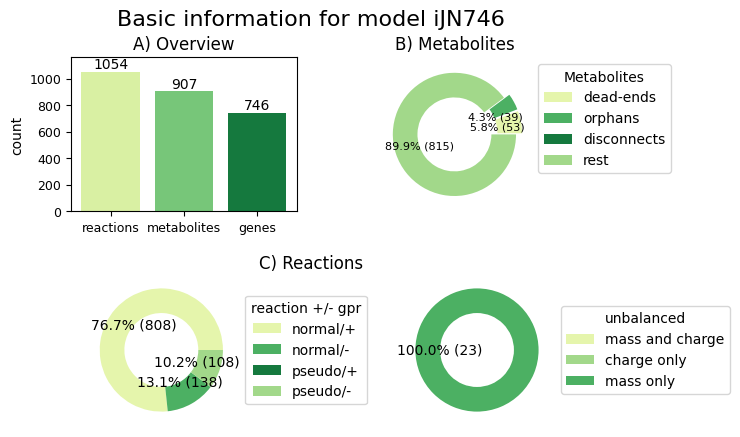

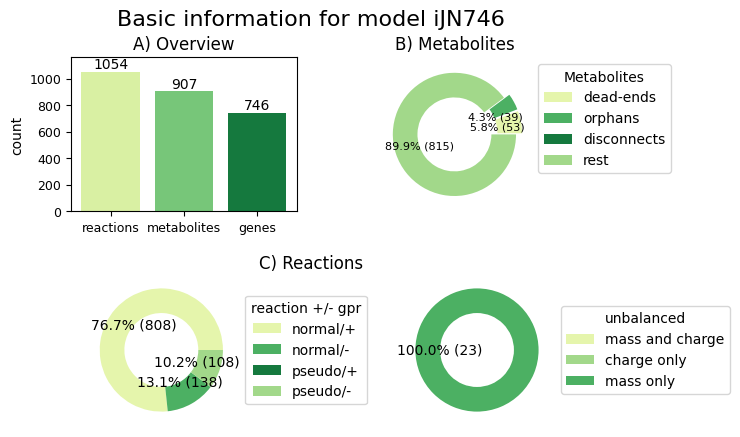

In [13]:
# Get visualisation of model statistics
model_info.visualise()

### 3. Find EGCs

In [14]:
# Imports
from refinegems.classes.egcs import GreedyEGCSolver

In [15]:
# Initialise EGCSolver object
egc_solver = GreedyEGCSolver(chunksize=11)
egc_solver

In [16]:
# Find EGCs & show which metabolites cause EGCs (with the fluxes)
egcs = egc_solver.find_egcs(cobramodel, with_reacs=True)
egcs[1]

{'ATP': 1.0000000000000002,
 'CTP': 1.0,
 'GTP': 1.0,
 'UTP': 1.0000000000000002,
 'ACCOA': 0.9999999999999998,
 'PROTON': 4.000000000000001}

### 4. Growth & Auxotrophy tests

In [17]:
# Imports
from refinegems.analysis.growth import test_auxotrophies, growth_analysis
from refinegems.classes.medium import load_medium_from_db

In [18]:
# Media file path
media_file = './test_files/media_config.yml'

/Users/doebel/miniconda3/envs/refineGEMs/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/doebel/miniconda3/envs/refineGEMs/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/doebel/miniconda3/envs/refineGEMs/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


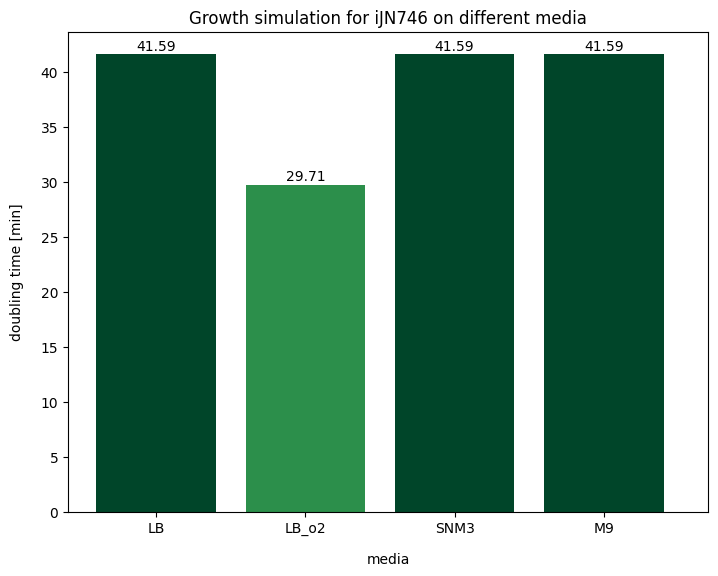

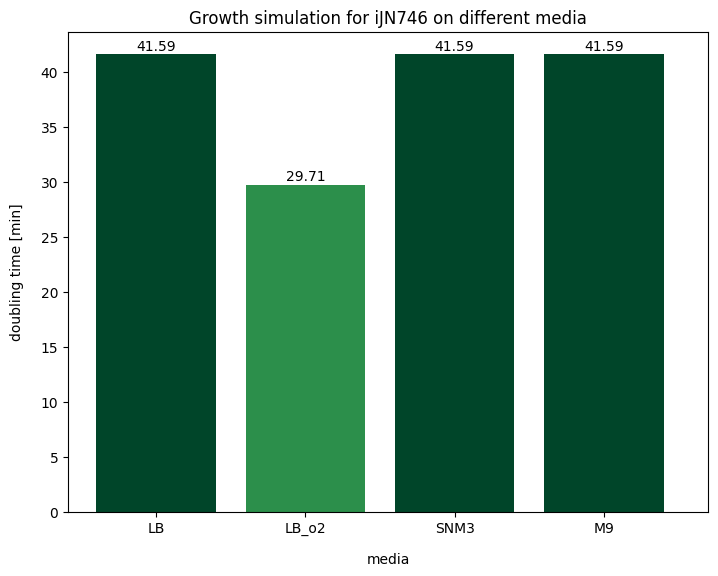

In [19]:
# Growth analysis with plot
growth_analysis(cobramodel, media_file)

In [20]:
# Get list of media to be used for auxotrophy tests
# List of medium names
media = ['LB', 'M9']

# Retrieve media from internal database via name into a list
media2use = []
for m in media:
	media2use.append(load_medium_from_db(m))

In [21]:
# Auxotrophy tests
auxo_rep = test_auxotrophies(cobramodel, media2use, ['min', None])
auxo_rep

/Users/doebel/miniconda3/envs/refineGEMs/lib/python3.10/site-packages/cobra/medium/minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
/Users/doebel/miniconda3/envs/refineGEMs/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/doebel/miniconda3/envs/refineGEMs/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/doebel/miniconda3/envs/refineGEMs/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/doebel/miniconda3/envs/refineGEMs/lib/python3.10/site-packages/cobra/medium/minimal_medium.py:112: FutureWarning: The defaul

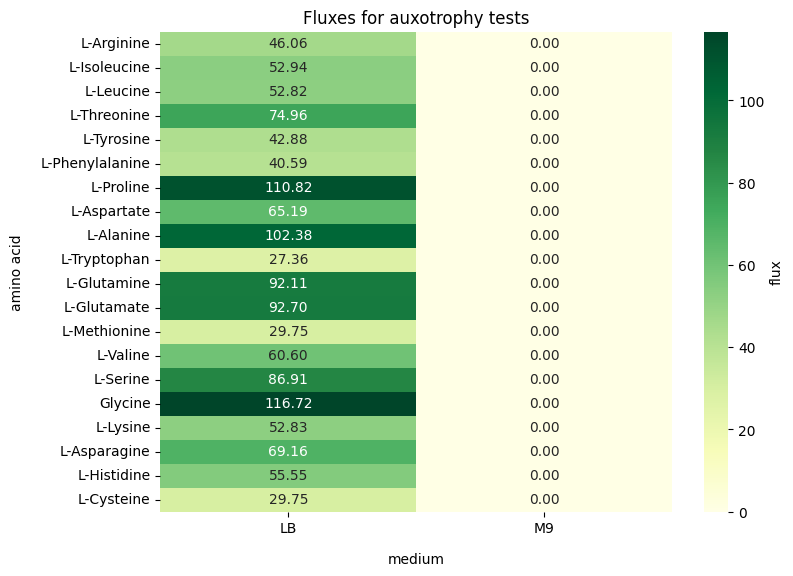

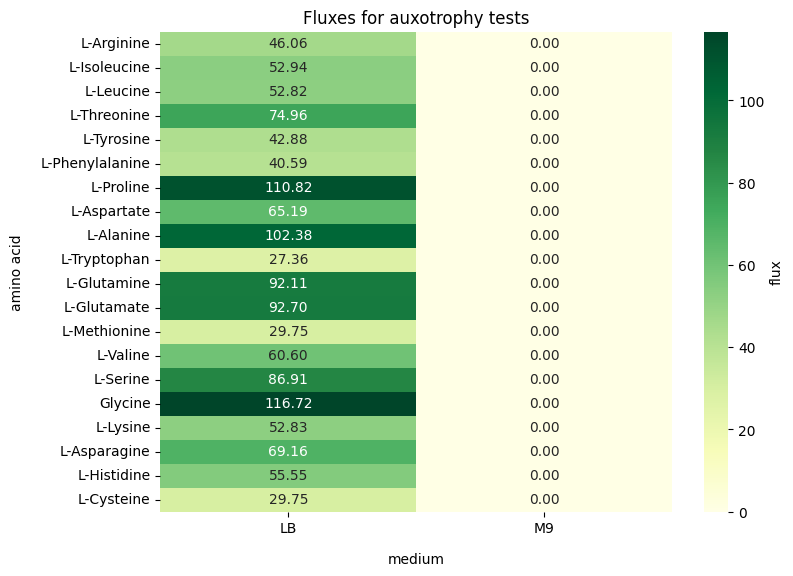

In [22]:
# Visualise auxotrophy report
auxo_rep.visualise_auxotrophies()